In [5]:
import numpy as np
import matplotlib.pyplot as plt

a = 0.3
epsilon = 0.01
gamma = 0.5
I = 0.0
dt = 0.01
T = 100

t_values = np.arange(0, T, dt)

In [6]:
def dvdt(v, w):
    return -v * (v - a) * (v - 1) - w + I

def dwdt(v, w):
    return epsilon * (v - gamma * w)

def rk2(v0, w0):
    v_values = [v0]
    w_values = [w0]
    dv_values = []
    
    v, w = v0, w0
    for t in t_values:
        dv1 = dvdt(v, w)
        dw1 = dwdt(v, w)
        
        v_half = v + 0.5 * dt * dv1
        w_half = w + 0.5 * dt * dw1
        dv2 = dvdt(v_half, w_half)
        dw2 = dwdt(v_half, w_half)
        
        v += dt * dv2
        w += dt * dw2
        
        v_values.append(v)
        w_values.append(w)
        dv_values.append(dv1)
        
    return np.array(v_values), np.array(w_values), np.array(dv_values)

In [7]:
initial_conditions = [(0.4, 0), (0.5, 0), (0.6, 0)]
results = []

for v0, w0 in initial_conditions:
    t, v, w = rk2(v0, w0)
    results.append((t, v, w))

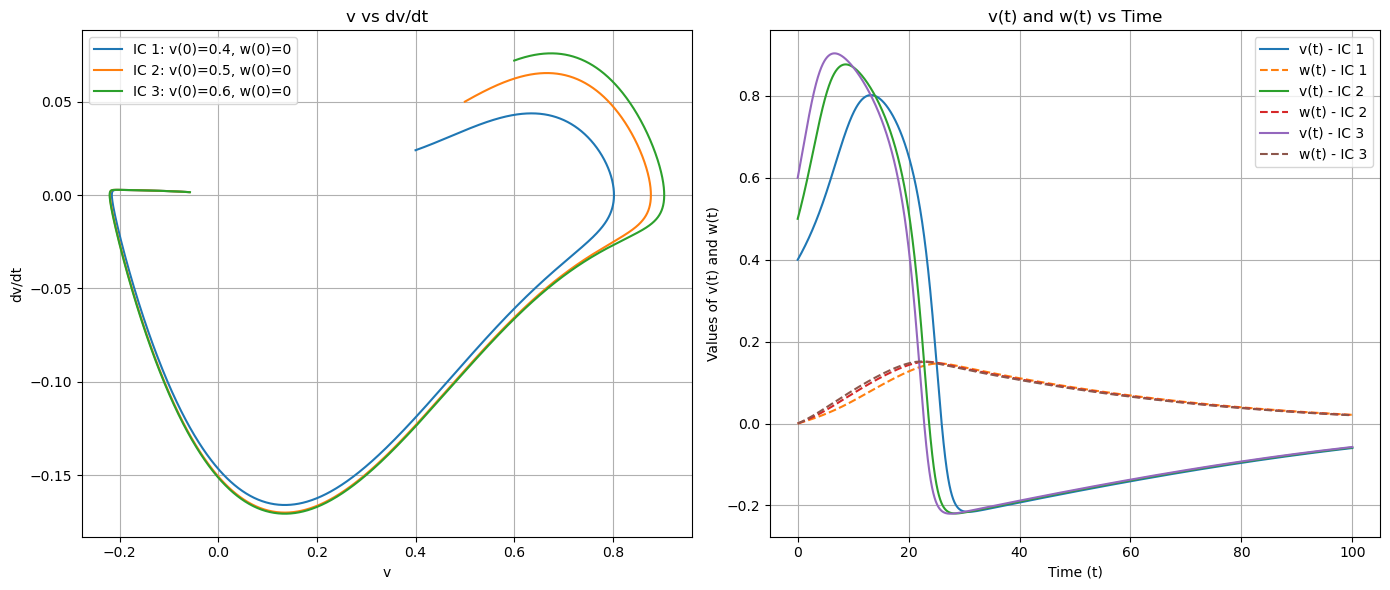

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# a) v vs dv/dt
for i, (v_values, w_values, dv_values) in enumerate(results):
    axes[0].plot(v_values[:-1], dv_values, label=f"IC {i+1}: v(0)={initial_conditions[i][0]}, w(0)=0")

axes[0].set_xlabel("v")
axes[0].set_ylabel("dv/dt")
axes[0].set_title("v vs dv/dt")
axes[0].legend()
axes[0].grid()

# b) v(t) and w(t) versus time t
for i, (v_values, w_values, _) in enumerate(results):
    axes[1].plot(t_values, v_values[:-1], label=f"v(t) - IC {i+1}")
    axes[1].plot(t_values, w_values[:-1], '--', label=f"w(t) - IC {i+1}")

axes[1].set_xlabel("Time (t)")
axes[1].set_ylabel("Values of v(t) and w(t)")
axes[1].set_title("v(t) and w(t) vs Time")
axes[1].legend()
axes[1].grid()

plt.tight_layout()